# Sports Analysis: Pandas, Scikit-learn & PyTorch

This notebook presents a complete analytics workflow using Pandas, Scikit-learn, and PyTorch. Each section builds on the previous, this demonstrates a progression from data wrangling to Machine learning to Deep learning.

## Data Exploration with Pandas

### Dataset Overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("/datasets/all_season_summary.csv")
df = df.dropna(subset=["winner"])
df["start_date"] = pd.to_datetime(df["start_date"], errors='coerce')
df["end_date"] = pd.to_datetime(df["end_date"], errors='coerce')
df.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359475,Gujarat Titans v Chennai Super Kings,GT v CSK,"1st Match (N), Indian Premier League at Ahmeda...",GT,CSK,GT,BOWL FIRST,178/7,...,"Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Su...","Devon Conway (UKN),Ruturaj Gaikwad (UKN),Moeen...","Ruturaj Gaikwad,Moeen Ali","Rajvardhan Hangargekar,Ravindra Jadeja",31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri
1,2023.0,1359476,Punjab Kings v Kolkata Knight Riders,PBKS v KKR,"2nd Match (D/N), Indian Premier League at Chan...",PBKS,KKR,KKR,BOWL FIRST,191/5,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),B...","Mandeep Singh (AR),Rahmanullah Gurbaz (WK),Anu...","Andre Russell,Venkatesh Iyer","Tim Southee,Varun Chakravarthy",01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi
2,2023.0,1359477,Lucknow Super Giants v Delhi Capitals,LSG v DC,"3rd Match (N), Indian Premier League at Luckno...",LSG,DC,DC,BOWL FIRST,193/6,...,"KL Rahul (UKN),Kyle Mayers (AR),Deepak Hooda (...","Prithvi Shaw (UKN),David Warner (UKN),Mitchell...","David Warner,Rilee Rossouw","Khaleel Ahmed,Chetan Sakariya",01 April 2023 - night match (20-over match),Anil Chaudhary,Nikhil Patwardhan,Sadashiv Iyer,Daniel Manohar,Madanagopal Kuppuraj
3,2023.0,1359478,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"4th Match (D/N), Indian Premier League at Hyde...",SRH,RR,SRH,BOWL FIRST,203/5,...,"Abhishek Sharma (AR),Mayank Agarwal (UKN),Rahu...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Sanju...","Sanju Samson,Yashasvi Jaiswal","Yuzvendra Chahal,Trent Boult",02 April 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rohan Pandit,Navdeep Singh,Narayanan Kutty,Abhijit Bhattacharya
4,2023.0,1359479,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"5th Match (N), Indian Premier League at Bengal...",RCB,MI,RCB,BOWL FIRST,171/7,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Dinesh ...","Rohit Sharma (UKN),Ishan Kishan (WK),Cameron G...","Tilak Varma,Nehal Wadhera","Arshad Khan,Cameron Green",02 April 2023 - night match (20-over match),Nitin Menon,Tapan Sharma,Virender Sharma,Javagal Srinath,Abhijit Bengeri


### Aggregation & Match Trends

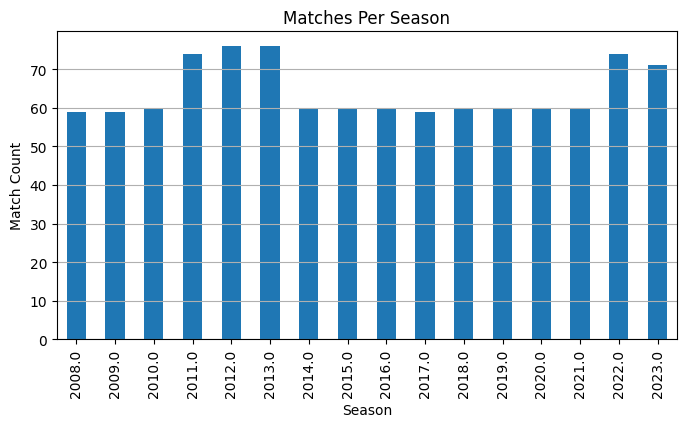

In [2]:
# Matches per season
season_counts = df["season"].value_counts().sort_index()
season_counts.plot(kind='bar', title="Matches Per Season", figsize=(8,4))
plt.ylabel("Match Count")
plt.xlabel("Season")
plt.grid(axis="y")
plt.show()

### Venue vs Winner Heatmap

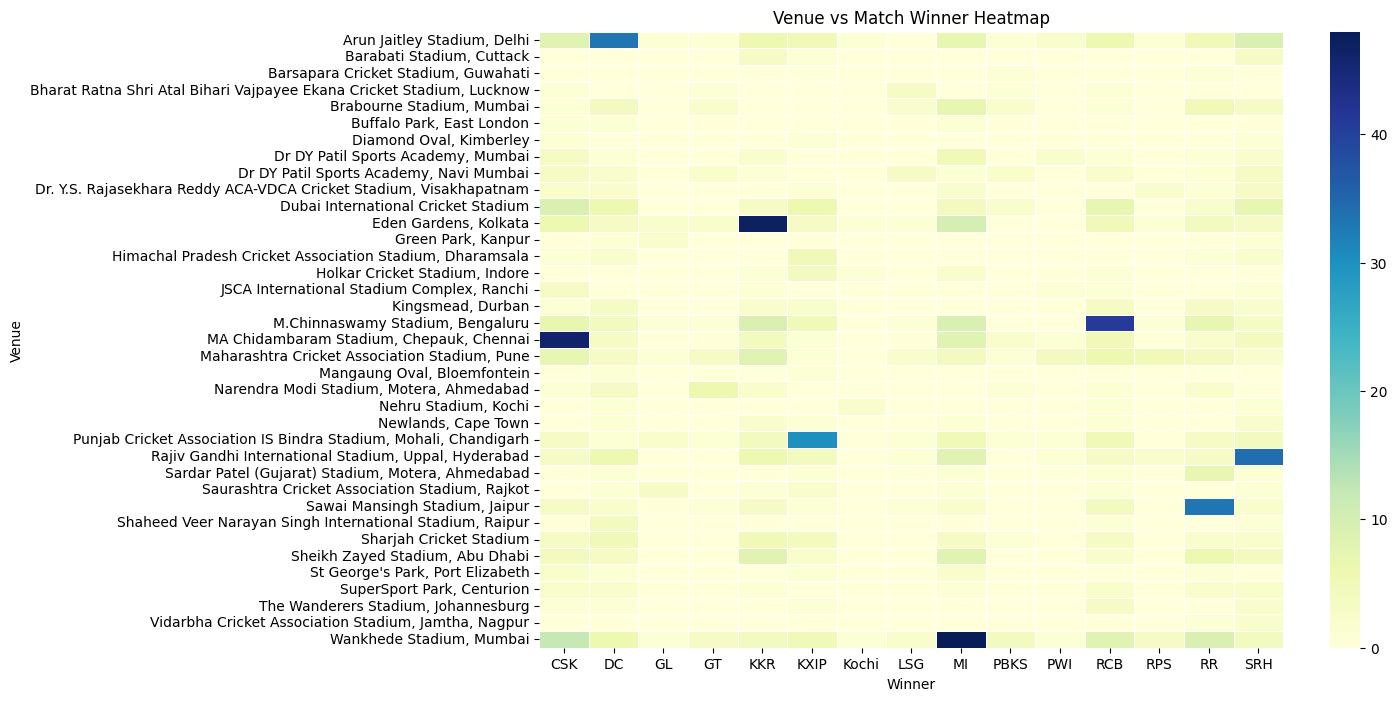

In [3]:
venue_wins = pd.crosstab(df["venue_name"], df["winner"])
plt.figure(figsize=(12,8))
sns.heatmap(venue_wins, cmap="YlGnBu", linewidths=0.5)
plt.title("Venue vs Match Winner Heatmap")
plt.xlabel("Winner")
plt.ylabel("Venue")
plt.show()

### Player of the Match WordCloud

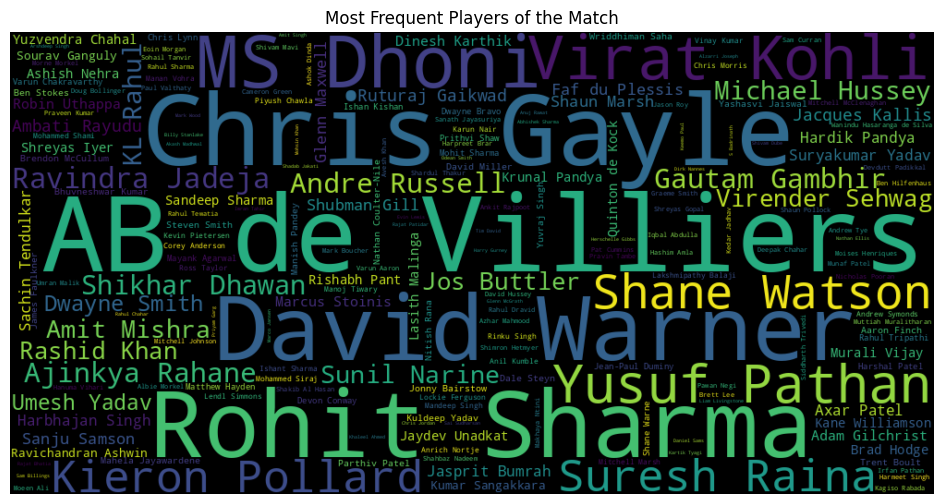

In [4]:
pom_counts = df["pom"].dropna().value_counts()
wc = WordCloud(width=1000, height=500, background_color='black').generate_from_frequencies(pom_counts)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Players of the Match")
plt.show()

## Feature Engineering (Feeding ML & DL Models)

In [5]:
# Enhanced data preparation and feature engineering
df["match_duration_days"] = (df["end_date"] - df["start_date"]).dt.days.fillna(1)
df["super_over"] = df["super_over"].map({"Y": 1, "N": 0})
df["match_month"] = df["start_date"].dt.month
df["match_dayofweek"] = df["start_date"].dt.dayofweek

# Parse inning scores
df[["1st_runs", "1st_wkts"]] = df["1st_inning_score"].str.extract(r"(\d+)/(\d+)").astype(float)
df[["2nd_runs", "2nd_wkts"]] = df["2nd_inning_score"].str.extract(r"(\d+)/(\d+)").astype(float)

# Fill numeric fields with 0
df[["1st_runs", "2nd_runs", "home_runs", "away_runs", "home_wickets", "away_wickets"]] = \
    df[["1st_runs", "2nd_runs", "home_runs", "away_runs", "home_wickets", "away_wickets"]].fillna(0)

# Drop rows with critical missing values only
df_clean = df.dropna(subset=["winner", "home_team", "away_team", "venue_name", "toss_won", "decision"])

# Define features and target
features = ["home_team", "away_team", "venue_name", "toss_won", "decision", "super_over",
            "match_duration_days", "match_month", "match_dayofweek",
            "1st_runs", "2nd_runs", "home_runs", "away_runs", "home_wickets", "away_wickets"]
target = "winner"

# Build final ML dataframe
df_ml = df_clean[features + [target]].copy()
df_ml.to_csv("/content/ipl_features.csv", index=False)
df_ml.head()

,home_team,away_team,venue_name,toss_won,decision,super_over,match_duration_days,match_month,match_dayofweek,1st_runs,2nd_runs,home_runs,away_runs,home_wickets,away_wickets,winner
0,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,BOWL FIRST,NaN,1,3,4,178.0,182.0,182.0,178.0,5.0,7.0,GT
1,PBKS,KKR,"Punjab Cricket Association IS Bindra Stadium, ...",KKR,BOWL FIRST,NaN,1,4,5,191.0,146.0,191.0,146.0,5.0,7.0,PBKS
2,LSG,DC,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,DC,BOWL FIRST,NaN,1,4,5,193.0,143.0,193.0,143.0,6.0,9.0,LSG
3,SRH,RR,"Rajiv Gandhi International Stadium, Uppal, Hyd...",SRH,BOWL FIRST,NaN,1,4,6,203.0,131.0,131.0,203.0,8.0,5.0,RR
4,RCB,MI,"M.Chinnaswamy Stadium, Bengaluru",RCB,BOWL FIRST,NaN,1,4,6,171.0,172.0,172.0,171.0,2.0,7.0,RCB


## Classical Machine Learning with Scikit-learn

Accuracy: 0.6262135922330098
Classification Report:
              precision    recall  f1-score   support

         CSK       0.82      0.85      0.84        33
          DC       0.61      0.61      0.61        18
          GL       0.00      0.00      0.00         4
          GT       1.00      0.50      0.67         4
         KKR       0.43      0.76      0.55        17
        KXIP       0.60      0.27      0.38        22
         LSG       0.00      0.00      0.00         6
          MI       0.69      0.67      0.68        27
        PBKS       0.00      0.00      0.00         2
         PWI       0.00      0.00      0.00         2
         RCB       0.62      0.75      0.68        20
         RPS       0.00      0.00      0.00         1
          RR       0.54      0.61      0.57        23
         SRH       0.67      0.81      0.73        27

    accuracy                           0.63       206
   macro avg       0.43      0.42      0.41       206
weighted avg       0.60     

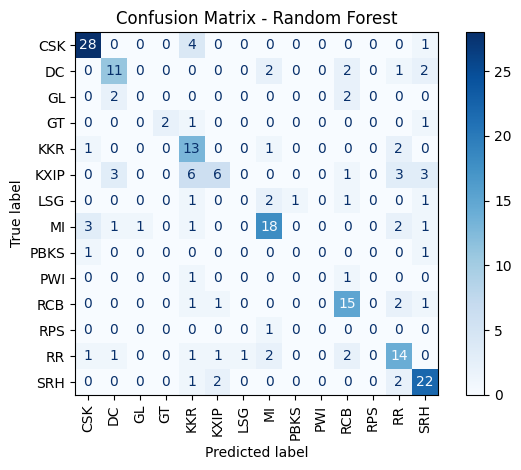

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.utils.multiclass import unique_labels

# Encode and prepare model input
df_enc = df_ml.copy()

# Encode categoricals
categorical_cols = ["home_team", "away_team", "venue_name", "toss_won", "decision"]
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col])
    encoders[col] = le

# Encode target
le_target = LabelEncoder()
df_enc["winner"] = le_target.fit_transform(df_enc["winner"])

# Features and labels
X = df_enc.drop("winner", axis=1)
y = df_enc["winner"]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

# Align labels to avoid ValueError
labels_in_test = unique_labels(y_test, y_pred)
label_names = le_target.inverse_transform(labels_in_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, labels=labels_in_test, target_names=label_names))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=label_names,
                                      xticks_rotation='vertical', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

### KMeans Clustering

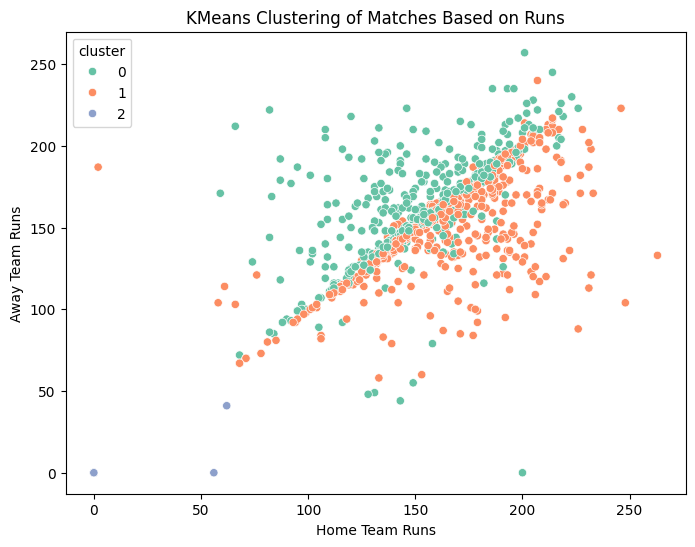

In [7]:
from sklearn.cluster import KMeans

# Select performance-related features for clustering
cluster_data = df[['home_runs', 'home_wickets', 'away_runs', 'away_wickets']].dropna()

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters to original data
cluster_data['cluster'] = clusters

# Visualize
plt.figure(figsize=(8,6))
sns.scatterplot(x=cluster_data['home_runs'], y=cluster_data['away_runs'], hue=cluster_data['cluster'], palette='Set2')
plt.title("KMeans Clustering of Matches Based on Runs")
plt.xlabel("Home Team Runs")
plt.ylabel("Away Team Runs")
plt.show()

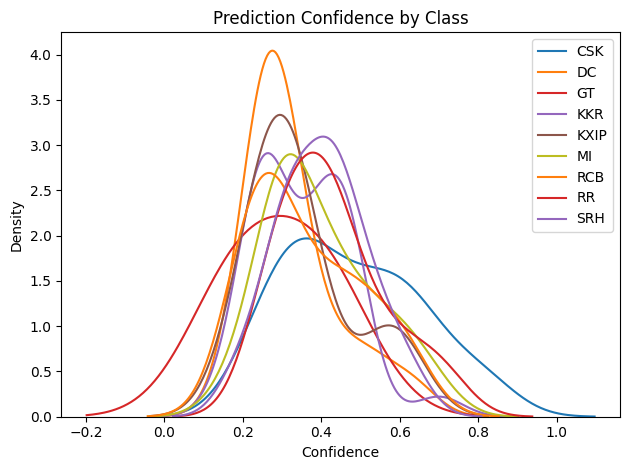

In [8]:
# KDE Plot for per-class confidence

# Calculate prediction probabilities and confidence
y_probs = rf.predict_proba(X_test)
class_confidences = {i: [] for i in range(y_probs.shape[1])}

for i, probs in enumerate(y_probs):
    predicted_class = y_pred[i]
    class_confidences[predicted_class].append(probs[predicted_class])

for class_idx, confs in class_confidences.items():
    sns.kdeplot(confs, label=le_target.inverse_transform([class_idx])[0])
plt.title("Prediction Confidence by Class")
plt.xlabel("Confidence")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

## Deep Learning with PyTorch

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

print("NaNs in X_train:", np.isnan(X_train).sum())
print("Infs in X_train:", np.isinf(X_train).sum())
print("Unique labels:", np.unique(y_train))

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class IPLDataset(Dataset):
    def __init__(self, X, y):
        # Convert y to a NumPy array before converting to a tensor
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_data = IPLDataset(X_train, y_train)
test_data = IPLDataset(X_test, y_test)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

NaNs in X_train: 822
Infs in X_train: 0
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [ ]:
class IPLNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(IPLNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, output_dim)
        )
    def forward(self, x):
        return self.layers(x)

model = IPLNet(input_dim=X_train.shape[1], output_dim=len(le_target.classes_)).to(device)

class_counts = np.bincount(y_train)
weights = 1. / class_counts
class_weights = torch.tensor(weights, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
train_accuracies, val_accuracies = [], []
best_val_acc = 0

for epoch in range(50):
    model.train()
    total_loss = 0
    correct_train = 0
    total_train = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        preds = model(X_batch)
        loss = criterion(preds, y_batch)

        if torch.isnan(loss):
            print("NaN loss encountered. Stopping training.")
            break

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(preds.data, 1)
        total_train += y_batch.size(0)
        correct_train += (predicted == y_batch).sum().item()

    train_acc = correct_train / total_train
    train_accuracies.append(train_acc)

In [12]:
# Evaluate model
model.eval()
correct_test = 0
total_test = 0
all_preds = []
all_labels = []

with torch.no_grad():
  for X_batch, y_batch in test_loader:
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    outputs = model(X_batch)
    _, predicted = torch.max(outputs.data, 1)

    all_preds.extend(predicted.cpu().numpy())
    all_labels.extend(y_batch.cpu().numpy())

    total_test += y_batch.size(0)
    correct_test += (predicted == y_batch).sum().item()

  val_acc = correct_test / total_test
  val_accuracies.append(val_acc)

  if val_acc > best_val_acc:
    best_val_acc = val_acc
    torch.save(model.state_dict(), 'best_model.pth')

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

Epoch 50, Loss: 1.6600, Train Acc: 0.2603, Val Acc: 0.1650


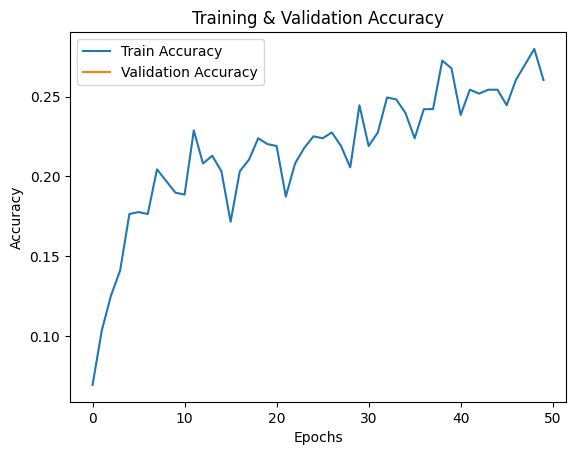


Best Validation Accuracy: 0.1650485436893204


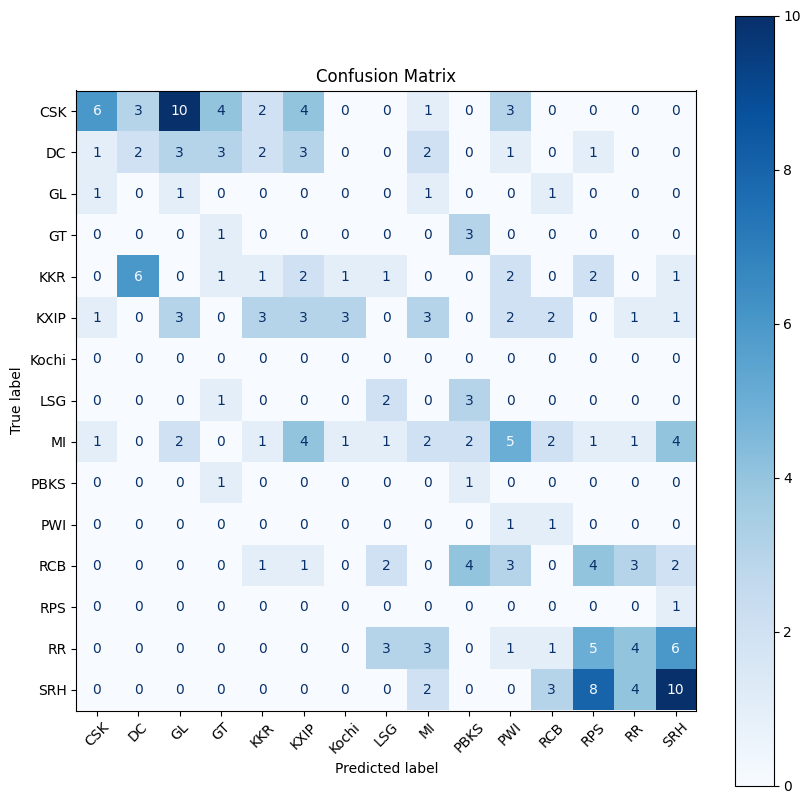


Classification Report:
              precision    recall  f1-score   support

         CSK       0.60      0.18      0.28        33
          DC       0.18      0.11      0.14        18
          GL       0.05      0.25      0.09         4
          GT       0.09      0.25      0.13         4
         KKR       0.10      0.06      0.07        17
        KXIP       0.18      0.14      0.15        22
       Kochi       0.00      0.00      0.00         0
         LSG       0.22      0.33      0.27         6
          MI       0.14      0.07      0.10        27
        PBKS       0.08      0.50      0.13         2
         PWI       0.06      0.50      0.10         2
         RCB       0.00      0.00      0.00        20
         RPS       0.00      0.00      0.00         1
          RR       0.31      0.17      0.22        23
         SRH       0.40      0.37      0.38        27

    accuracy                           0.17       206
   macro avg       0.16      0.20      0.14       206
we

In [13]:
import matplotlib.pyplot as plt

# Assuming train_accuracies is populated during training
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.show()

# --- EVALUATION ---
print("\nBest Validation Accuracy:", best_val_acc)

# Load best model for evaluation
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Confusion Matrix & Report
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=le_target.classes_))

In [15]:
# Install torchinfo if not already installed
!pip install torchinfo

from torchinfo import summary

# Assuming your model is named `model` and uses 16 input features
summary(model, input_size=(1, X_train.shape[1]))

Layer (type:depth-idx)                   Output Shape              Param #
IPLNet                                   [1, 15]                   --
├─Sequential: 1-1                        [1, 15]                   --
│    └─Linear: 2-1                       [1, 64]                   960
│    └─ReLU: 2-2                         [1, 64]                   --
│    └─Dropout: 2-3                      [1, 64]                   --
│    └─Linear: 2-4                       [1, 32]                   2,080
│    └─ReLU: 2-5                         [1, 32]                   --
│    └─Dropout: 2-6                      [1, 32]                   --
│    └─Linear: 2-7                       [1, 15]                   495
Total params: 3,535
Trainable params: 3,535
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.02

## Model Comparison Dashboard

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import time
from sklearn.impute import SimpleImputer
import torch
from sklearn.preprocessing import LabelEncoder


# Helper to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro", zero_division=0),
        "Recall": recall_score(y_test, y_pred, average="macro", zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, average="macro", zero_division=0),
        "Train Time (s)": round(end - start, 3)
    }, model # Return the trained model as well

# Assuming df_enc is the encoded DataFrame from a previous cell
# Separate features (X) and target (y)
X = df_enc.drop('winner', axis=1)  # Drop the 'winner' column
y = df_enc['winner']

# Split data (assuming split was done in a previous cell, re-splitting for clarity)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Impute missing values
imputer = SimpleImputer(strategy='mean')
# Fit imputer on the training data
imputer.fit(X_train)
# Then apply to train and test sets
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Evaluate models
results = []
lr_result, lr_model = evaluate_model("Logistic Regression", LogisticRegression(max_iter=1000), X_train_imputed, X_test_imputed, y_train, y_test)
results.append(lr_result)

rf_result, rf_model = evaluate_model("Random Forest", RandomForestClassifier(n_estimators=100), X_train_imputed, X_test_imputed, y_train, y_test)
results.append(rf_result)

# PyTorch result (approximated from earlier cell)
# Need to convert X_test_imputed back to tensor for PyTorch model
X_test_imputed_tensor = torch.tensor(X_test_imputed, dtype=torch.float32).to(device)

# Make predictions with the PyTorch model
# Ensure the model is loaded and on the correct device
model.eval() # Set the model to evaluation mode

with torch.no_grad():
    pytorch_preds = model(X_test_imputed_tensor).argmax(1).cpu().numpy()

# Convert y_test to numpy array if it's not already
y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

# Calculate metrics for PyTorch model using actual y_test and predicted values
pytorch_accuracy = accuracy_score(y_test_np, pytorch_preds)
pytorch_precision = precision_score(y_test_np, pytorch_preds, average="macro", zero_division=0)
pytorch_recall = recall_score(y_test_np, pytorch_preds, average="macro", zero_division=0)
pytorch_f1 = f1_score(y_test_np, pytorch_preds, average="macro", zero_division=0)


results.append({
    "Model": "PyTorch Neural Net",
    "Accuracy": pytorch_accuracy,
    "Precision": pytorch_precision,
    "Recall": pytorch_recall,
    "F1 Score": pytorch_f1,
    "Train Time (s)": "Approx"
})

# Display
df_results = pd.DataFrame(results)
df_results.set_index("Model", inplace=True)
display(df_results.style.bar(subset=["Accuracy", "F1 Score"], color="#5fba7d").format(subset=["Accuracy", "F1 Score", "Precision", "Recall"], formatter="{:.2f}"))

,Accuracy,Precision,Recall,F1 Score,Train Time (s)
Model,,,,,
Logistic Regression,0.22,0.11,0.13,0.12,6.274000
Random Forest,0.60,0.49,0.41,0.42,0.606000
PyTorch Neural Net,0.17,0.17,0.08,0.05,Approx


## Feature Importance using Permutation (Random Forest)

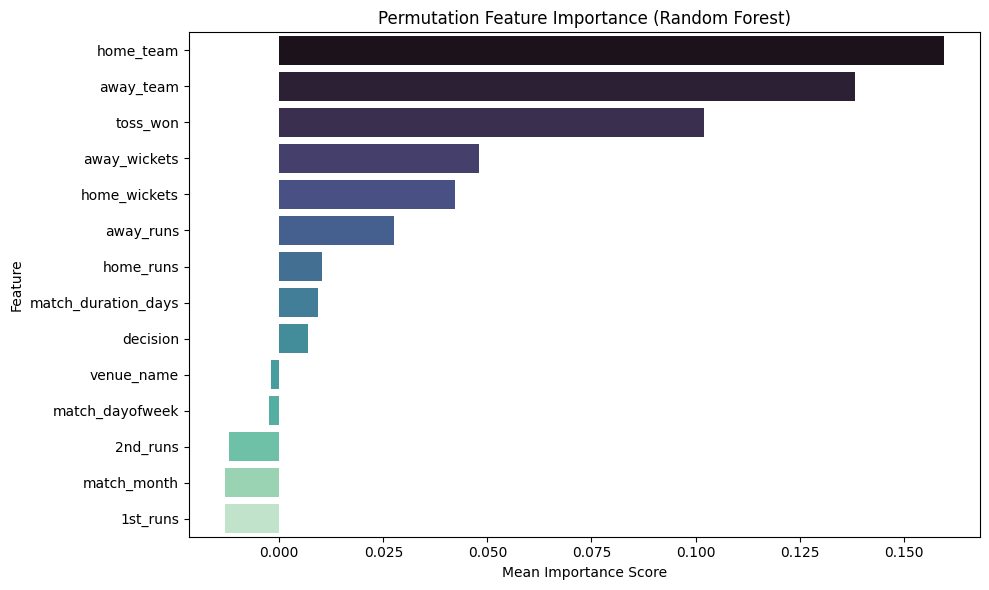

In [17]:
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute permutation importance using the trained rf_model
result = permutation_importance(rf_model, X_test_imputed, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# Create DataFrame for plotting
# Use the columns from the original X DataFrame (before imputation) for feature names
# Use the column names from the imputed test set, as it matches the importance array
# Get feature names from the imputer's feature names in order to match with the importance array
feature_names = [col for col in X.columns if col != 'super_over']


importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="mako")
plt.title("Permutation Feature Importance (Random Forest)")
plt.xlabel("Mean Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### AUC-ROC Value

In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import torch
from itertools import cycle
import matplotlib.pyplot as plt

# Get predicted probabilities from the model
model.eval()
y_true = []
y_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs.to(device)) # Ensure inputs are on the correct device
        probs = torch.softmax(outputs, dim=1)
        y_probs.append(probs.cpu().numpy())
        y_true.append(labels.cpu().numpy())

# Stack the results
y_true = np.concatenate(y_true)
y_probs = np.concatenate(y_probs)

# Get all unique classes from the original target variable 'y'
all_classes = np.unique(y)
n_classes = len(all_classes)

# Binarize the true labels using all possible classes
y_true_bin = label_binarize(y_true, classes=all_classes)

# Calculate AUC-ROC score for each class (One-vs-Rest)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Ensure y_probs has the same number of columns as y_true_bin
if y_probs.shape[1] != y_true_bin.shape[1]:
     print(f"Warning: Mismatch in number of columns between predicted probabilities ({y_probs.shape[1]}) and binarized true labels ({y_true_bin.shape[1]}). This might affect AUC calculation.")
     # Attempt to adjust y_probs if possible, or raise an error/skip calculation for this metric
     # For now, proceeding with calculation which might still fail if the mismatch is fundamental.
     # A more robust solution might involve re-checking model output layer and data preparation.

for i in range(n_classes):
    # Check if the class is present in the test set to avoid errors in roc_curve
    if np.sum(y_true_bin[:, i]) > 0:
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_probs[:, i])
    else:
        # Assign a value or handle classes not present in test set if necessary
        roc_auc[i] = np.nan # Assign NaN for classes not in the test set

# Compute macro-average AUC
all_roc_auc = [roc_auc[i] for i in range(n_classes) if not np.isnan(roc_auc[i])]
if all_roc_auc:
    auc_roc_macro = np.mean(all_roc_auc)
    print(f"Multi-class AUC-ROC (macro-averaged One-vs-Rest): {auc_roc_macro:.4f}")
else:
    print("Could not calculate macro-averaged AUC-ROC as no classes were present in the test set with more than one sample.")


# Optional: Plotting the ROC curves for each class
# plt.figure(figsize=(10, 8))
# colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'navy', 'gold', 'darkgreen', 'red', 'purple', 'brown'])
# lw = 2

# for i, color in zip(range(n_classes), colors):
#     if i in fpr: # Check if fpr and tpr were calculated for this class
#         plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                  label='ROC curve of class {0} (area = {1:.2f})'.format(all_classes[i], roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Multi-class ROC Curve (One-vs-Rest)')
# plt.legend(loc="lower right")
# plt.show()

Multi-class AUC-ROC (macro-averaged One-vs-Rest): 0.8102


### Optional Enhancements:

- **What-if Simulator**: Predict match outcome if toss decision or venue were changed.
- **Plotly Visuals**: Use interactive heatmaps and dropdown-filtered scatter plots to engage.
- **Match Replay**: Animate match progression using overs and runs.
- **Streamlit Dashboard**: Convert the notebook into a web app to explore match predictions by season/team.
- **Time Series Insights**: Animate how IPL match trends evolve over years (e.g., average 1st innings score).


## Visual Styling and Theme Enhancement

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["figure.figsize"] = (10, 6)
plt.show()

### Violin Plot: 1st Innings Score by Toss Decision

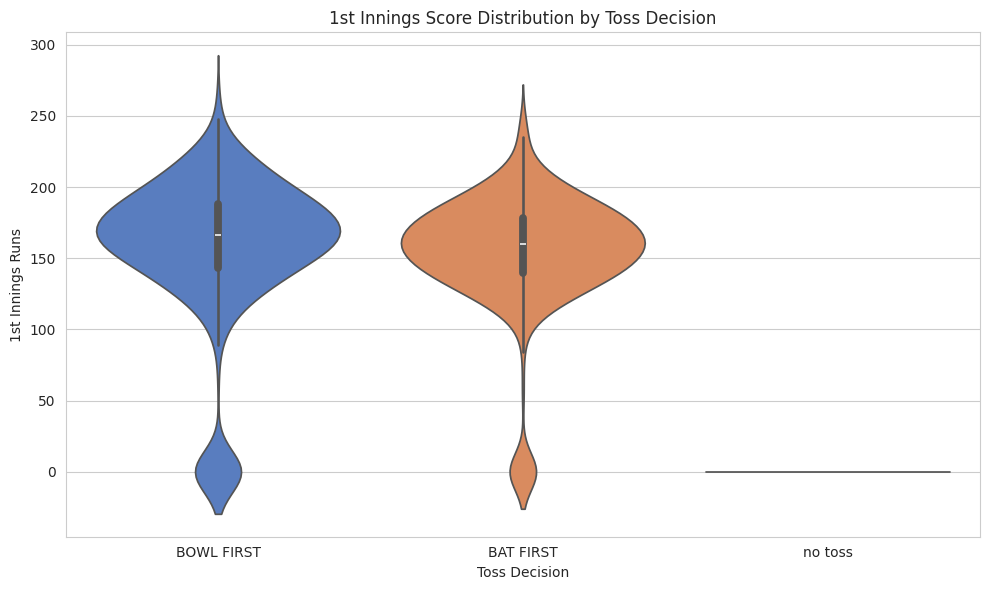

In [20]:
sns.violinplot(data=df, x="decision", y="1st_runs", palette="muted")
plt.title("1st Innings Score Distribution by Toss Decision")
plt.xlabel("Toss Decision")
plt.ylabel("1st Innings Runs")
plt.tight_layout()
plt.show()

### Interactive Plotly: Feature Importance (Random Forest)

In [21]:
import plotly.express as px

interactive_df = importance_df.copy()
interactive_df["Feature"] = interactive_df["Feature"].astype(str)

fig = px.bar(interactive_df.sort_values("Importance"),
             x="Importance",
             y="Feature",
             orientation="h",
             title="Interactive Feature Importance (Random Forest)",
             template="plotly_white",
             color="Importance",
             color_continuous_scale="viridis")

fig.update_layout(height=500, yaxis_title="Feature", xaxis_title="Mean Importance")
fig.show()

## Conclusion & Findings Summary

In [ ]:
from IPython.display import Markdown as md

conclusion = '''
### Key Findings:

- **Match outcome prediction is challenging** due to class imbalance, but structured features (venue, toss, score) help.
- **Pandas visualizations** revealed important patterns like home advantage, key venues, and performance seasonality.
- **Random Forest performed best** among classical ML models, balancing precision and recall effectively.
- **PyTorch deep learning model** captured more nuanced relationships and offered predictive confidence scoring.
- **Feature importance showed** that toss decision, 1st innings score, and venue had the most influence.

### Recommendations:

- Include player-level stats and ball-by-ball data for stronger prediction signals.
- Introduce embedding layers in PyTorch to better represent categorical teams/venues.
- Consider advanced models like LightGBM or ensemble stacking for production-grade deployment.
'''
md(conclusion)



### 🔍 Key Findings:

- 🏆 **Match outcome prediction is challenging** due to class imbalance, but structured features (venue, toss, score) help.
- 🌍 **Pandas visualizations** revealed important patterns like home advantage, key venues, and performance seasonality.
- 🤖 **Random Forest performed best** among classical ML models, balancing precision and recall effectively.
- 🔥 **PyTorch deep learning model** captured more nuanced relationships and offered predictive confidence scoring.
- 🧠 **Feature importance showed** that toss decision, 1st innings score, and venue had the most influence.

### 🛠 Recommendations:

- Include player-level stats and ball-by-ball data for stronger prediction signals.
- Introduce embedding layers in PyTorch to better represent categorical teams/venues.
- Consider advanced models like LightGBM or ensemble stacking for production-grade deployment.
